In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import operator
from functools import reduce

In [19]:
N=100000
y = np.random.normal(0,1,N)
y = np.append(y, np.random.normal(.3,1,N))
y = np.append(y, np.random.normal(0,1.2,N))
cat = reduce(operator.concat,[['A']*N, ['B']*N, ['C']*N])
data = pd.DataFrame({'type': cat, 'y': y})

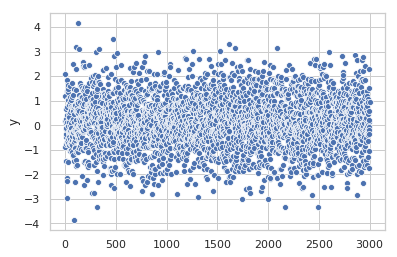

In [13]:
sns.set(style="whitegrid")

ax = sns.scatterplot(x=data.index, y='y', data=data.sample(frac=1))
ax.get_figure().savefig('raw_data.png', dpi=200)


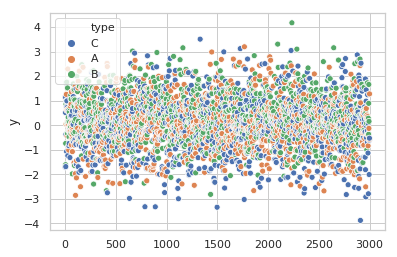

In [14]:
ax.get_figure().clf()
ax = sns.scatterplot(x=data.index, y='y', hue='type', data=data.sample(frac=1))
ax.get_figure().savefig('labeled_data.png', dpi=200)

In [31]:
data.groupby('type').describe()

y                                                              \
         count      mean       std       min       25%       50%       75%   
type                                                                         
A     100000.0  0.001783  1.002146 -4.589503 -0.672264  0.005135  0.675946   
B     100000.0  0.299302  0.998388 -4.025922 -0.372632  0.299278  0.973782   
C     100000.0 -0.001799  1.202007 -5.653683 -0.816541 -0.001511  0.808835   

                
           max  
type            
A     4.312120  
B     4.647791  
C     4.978546

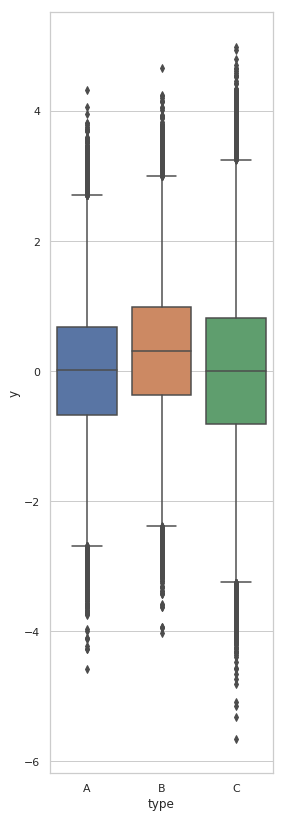

In [28]:
sns.set(style="whitegrid")
ax=sns.boxplot(x='type', y='y', data=data)
ax.get_figure().set_size_inches(4, 14)
ax.get_figure().savefig('boxplot.png', dpi=200)

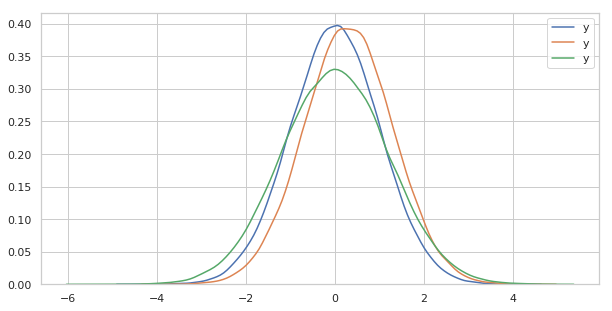

In [30]:
ax = sns.kdeplot(data[data.type=='A'].y, legend='A')
ax = sns.kdeplot(data[data.type=='B'].y, legend='B')
ax = sns.kdeplot(data[data.type=='C'].y, legend='C')
ax.get_figure().set_size_inches(10, 5)
ax.get_figure().savefig('kde.png', dpi=200)


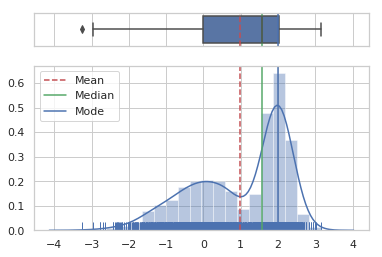

In [95]:
N=1000
y = np.random.normal(0,1,N)
y = np.append(y, np.random.normal(2,.3,N))
y = pd.Series(y)

mean=y.mean()
median=y.median()
mode=2

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(y, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(y, ax=ax_hist,kde=True, rug=True)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')


plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()
f.savefig('centrality.png', dpi=200)


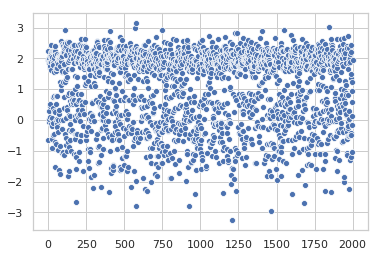

In [100]:
ax=sns.scatterplot(y.index, y.sample(frac=1))
ax.get_figure().savefig('scatterplot.png', dpi=200)

In [114]:
pd.DataFrame({'range':y.max()-y.min(), 'desvio padrao':y.std(), 'variancia': y.var(), 'interquartil': y.quantile(.75)-y.quantile(.25)},index={'espalhamento'})


,range,desvio padrao,variancia,interquartil
espalhamento,6.417271,1.253471,1.57119,2.028722
